In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from scipy.stats import chi2, norm, cauchy
from iminuit import Minuit
from iminuit.cost import LeastSquares
# Cambiare directory per spostarsi nella cartella principale
import os
while not os.getcwd().endswith('Laboratorio_SiPM'):
    os.chdir('..')

import sys
sys.path.append('Config')
from lablib import *

# Sodio 30 min

Text(0.5, 1.0, 'Spettro di sodio e background')

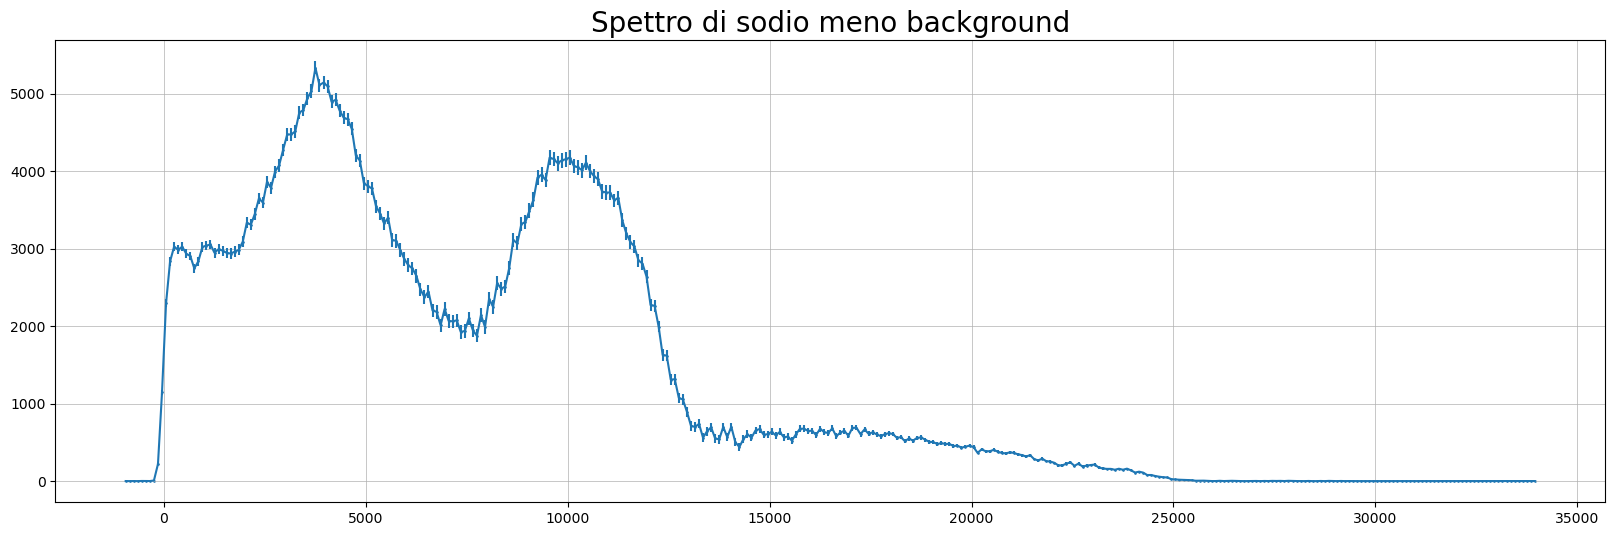

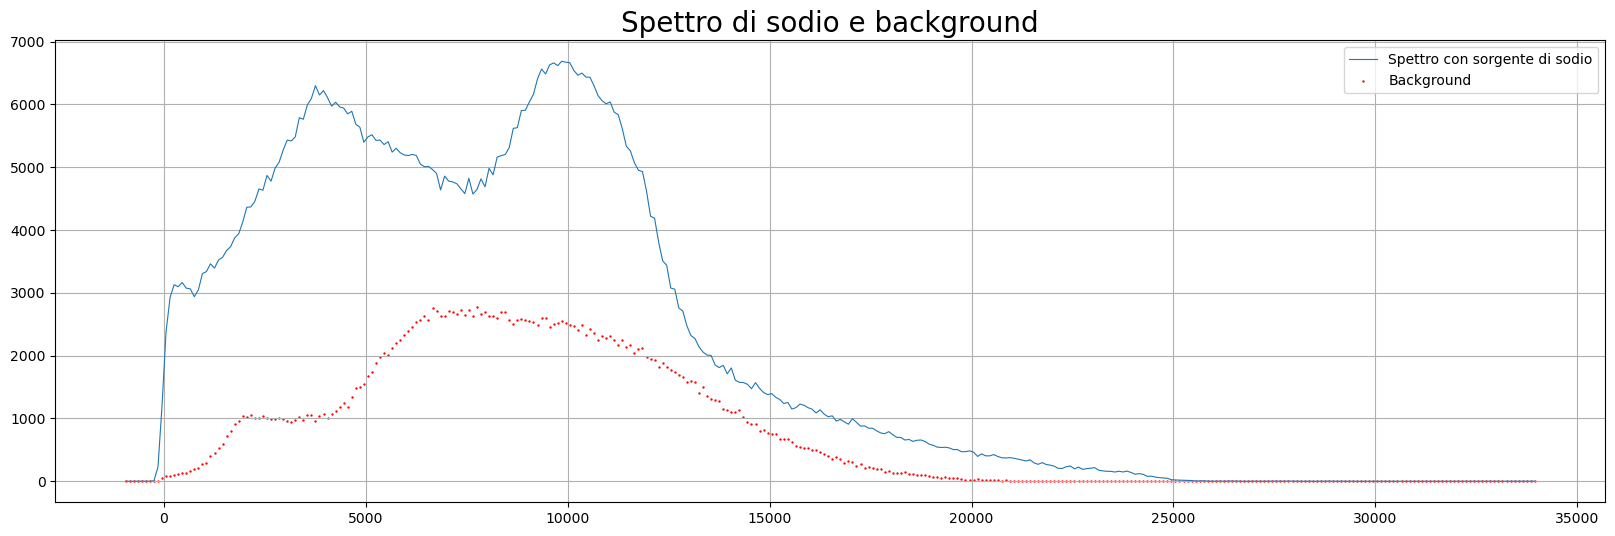

In [32]:
df_bkg = read_corretto(path='Dati/Parte 2/LySO/Bkg_30min.txt', titles=['ADC', 'Counts'])
df = read_corretto(path = 'Dati/Parte 2/LySO/Sodio_30min.txt', titles=['ADC', 'Counts'])
df_nobkg = df[:] - df_bkg [:]
df_nobkg['ADC'] = df['ADC']
err_df_nobkg = np.array(np.sqrt(df['Counts'][:] + df_bkg['Counts'][:]))
# print(len(df), '\n', len(df_bkg), '\n', df_nobkg)
fig, ax = plt.subplots(figsize = (20, 6))
plt.title('Spettro di sodio meno background', fontsize = 20)
plt.grid(True, linewidth = 0.5)
plt.scatter(df_nobkg['ADC'], df_nobkg['Counts'], s = 0.8)
plt.errorbar(df['ADC'], df_nobkg['Counts'], yerr=  err_df_nobkg)
fig, ax = plt.subplots(figsize = (20, 6))
plt.plot(df['ADC'], df['Counts'],  linewidth =0.8, label = 'Spettro con sorgente di sodio')
plt.scatter(df['ADC'], df_bkg['Counts'],color = 'red', s = 0.5, label = 'Background')
plt.legend()
plt.grid()

plt.title('Spettro di sodio e background', fontsize = 20)

## primo picco

<ErrorbarContainer object of 3 artists>

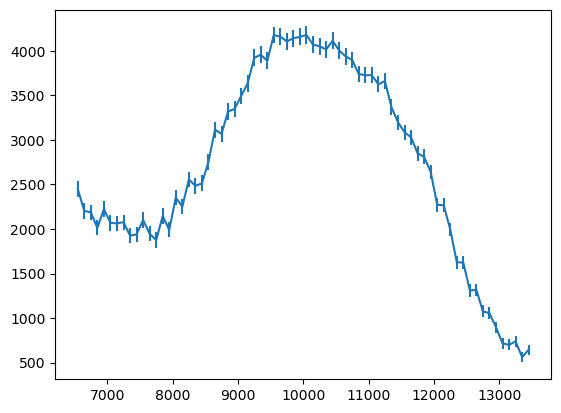

In [33]:
start_index = 140 - 65
end_index = 210 - 65
df_primo_picco = df_nobkg.iloc[start_index:end_index]
plt.errorbar(df_primo_picco['ADC'], df_primo_picco['Counts'], yerr = err_df_nobkg[start_index:end_index])

In [34]:
pars, vals, errs, *others = LS_fit(df_primo_picco['ADC'], df_primo_picco['Counts'], err_df_nobkg[start_index:end_index], gauss_pol1, mu = 10000, sigma = 1000, S = 2000, a = 0, b = 0)
for i in range(len(pars)):
    print(f'{pars[i]} = {vals[i]} +/- {errs[i]}')
s1 = vals[1]
mu1 = vals[0]

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 236.9 (χ²/ndof = 3.6)      │              Nfcn = 393              │
│ EDM = 4.76e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ mu    │ 10.429e3  │  0.017e3  │            │            │         │         │       │
│ 1 │ sigma │  1.431e3  │  0.023e3  │            │            │         │         │       │
│ 2 │ S     │  3.28e3   │  0.04e3   │            │            │         │         │       │
│ 3 │ a     │  3.70e3   │  0.07e3   │            │            │         │         │       │
│ 4 │ b     │  -0.265   │   0.008   │            │            │         │         │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───────┬────────────────────────────────────────────────────────┐
│       │         mu      sigma          S          a          b │
├───────┼────────────────────────────────────────────────────────┤
│    mu │        283     0.11e3     0.18e3     0.84e3 -103.69e-3 │
│ sigma │     0.11e3        518      0.5e3         -0  -74.96e-3 │
│     S │     0.18e3      0.5e3   1.54e+03     -0.1e3 -118.31e-3 │
│     a │     0.84e3         -0     -0.1e3    5.2e+03 -492.20e-3 │
│     b │ -103.69e-3  -74.96e-3 -118.31e-3 -492.20e-3   6.15e-05 │
└───────┴────────────────────────────────────────────────────────┘

mu = 10429.36047653261 +/- 16.820906862253043
sigma = 1430.9645220342677 +/- 22.769526995634013
S = 3284.5504937964897 +/- 39.25055865623122
a = 3701.1424168317662 +/- 72.1028434790507
b = -0.2653371970616013 +/- 0.007841260313659731


# cobalto


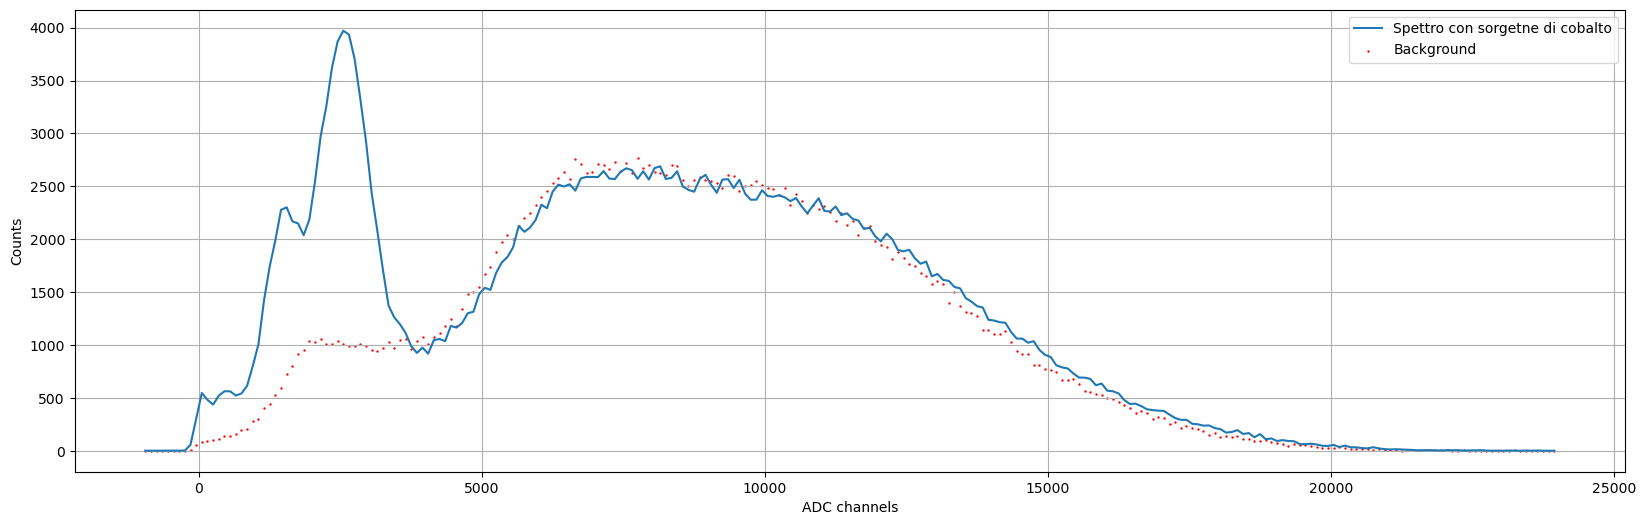

In [35]:
Co = read_corretto(path = 'Dati/Parte 2/LySO/Cobalto_30min.txt', titles=['ADC', 'Counts'])
Co_nobkg = Co[:] - df_bkg[:]
fig, axes = plt.subplots(1, 1,figsize = (20, 6))
# axes[0].set_title('Spettro di cobalto + background', fontsize = 20)
plt.plot(Co['ADC'][:250], Co['Counts'][:250], label = 'Spettro con sorgetne di cobalto')
# plt[1].plot(Co['ADC'], Co_nobkg['Counts'], label = 'Cobalto - Bkg')
plt.grid(True, linewidth = 0.8)
plt.ylabel('Counts')
plt.xlabel('ADC channels')
# plt[1].grid(True, linewidth = 0.5)
#plt.plot(Co['ADC'], Co_nobkg['Counts'])
plt.scatter(df_bkg['ADC'][:250], df_bkg['Counts'][:250], s = 0.5, label = 'Background', color = 'red')
plt.legend()
# plt.errorbar(df['ADC'], df_nobkg['Counts'], yerr=  err_df_nobkg)
# fig, ax = plt.subplots(figsize = (30, 6))
# plt.errorbar(df['ADC'], df_bkg['Counts'], yerr=  np.array(np.sqrt(df_bkg['Counts'][:])), fmt='o', markersize=0.5)
# plt.errorbar(df['ADC'], df['Counts'], yerr=  np.array(np.sqrt(df['Counts'][:])), fmt='o', markersize=0.5)
# plt.legend(['Background', 'Sodium'])
# plt.title('Spettro di sodio e background', fontsize = 20)

In [36]:
start_index = 94 - 65
end_index = 113 - 65
limit = [['mu', (1000, 5000)]]
pars, vals, errs, *others = LS_fit_lims(Co['ADC'][start_index:end_index], Co_nobkg['Counts'][start_index:end_index], 
                                        np.array(np.sqrt((Co[start_index:end_index]['Counts']) + df_bkg['Counts'][start_index:end_index])),
                                        gauss, mu = 2500, sigma = 600, S = 2000,  limits = limit)
s2 = vals[1]
mu2 = vals[0]

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 18.08 (χ²/ndof = 1.1)      │              Nfcn = 92               │
│ EDM = 1.32e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ mu    │  2.550e3  │  0.005e3  │            │            │  1000   │  5000   │       │
│ 1 │ sigma │    420    │     5     │            │            │         │         │       │
│ 2 │ S     │  2.988e3  │  0.031e3  │            │            │         │         │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───────┬───────────────────┐
│       │    mu sigma     S │
├───────┼───────────────────┤
│    mu │  23.2    -7    18 │
│ sigma │    -7  23.7   -92 │
│     S │    18   -92   955 │
└───────┴───────────────────┘

# Resolution

In [37]:
risoluzione_Na = 2.355 *  s1/ mu1
print('risoluzione sodio:', risoluzione_Na, '\n', 'risoluzione cobalto:', 2.355 * s2 / mu2)

risoluzione sodio: 0.323118704830795 
 risoluzione cobalto: 0.3877784044468422
